<a href="https://colab.research.google.com/github/sakshi12345Patil/Cardiovascular-disease-prediction/blob/main/ca1_6123_cardiovascular_Disease_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PROJECT INTRODUCED BY**
     
Sakshi dnyaneshwar patil

PRN:6123

class:TY(IT)02

**Cardiovascular disease prediction
Project Overview**

This project focuses on computer vision techniques for image classification and pattern recognition using various machine learning models. The goal is to explore the performance of different classifiers on a dataset after applying key preprocessing steps to enhance data quality and improve model accuracy.

**Methodology**

The workflow of the project consists of the following steps:

1.Data Collection

2.Data Preprocessing

3.Model Training and Evaluation

4.Results Analysis

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix

import warnings
warnings.filterwarnings('ignore') # Suppresses warnings to keep the output clean

**Data Preprocessing**

Preprocessing is a crucial step in preparing the dataset for model training. The following tasks were performed:




**Resizing**: Ensured all images had a uniform size to maintain consistency across the dataset.

**Normalization**: Scaled pixel values to a range of [0, 1] to stabilize learning and avoid saturation.

**Grayscale Conversion (if applicable)**: Converted images to grayscale for models that require reduced complexity.

**Data Augmentation**: Applied techniques like rotation, flipping, and zoom to artificially expand the dataset and improve model generalization.


In [ ]:
## Load the dataset
df = pd.read_csv('/content/Heart_Disease_Prediction.csv.xls')

In [ ]:
df.head()# Display the first few rows

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [ ]:
df.info()# Get a summary of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [ ]:
df.describe()# Generate descriptive statistics

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


In [ ]:
## Check for missing values
df.isna().sum()

,0
Age,0
Sex,0
Chest pain type,0
BP,0
Cholesterol,0
FBS over 120,0
EKG results,0
Max HR,0
Exercise angina,0
ST depression,0


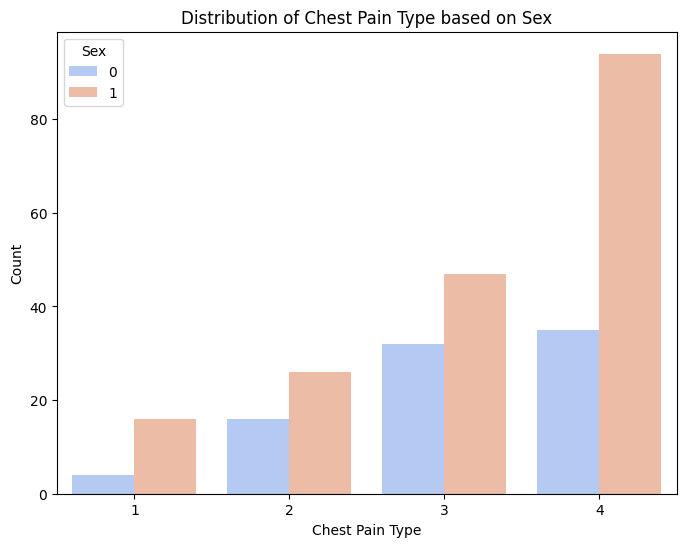

In [ ]:
# EDA: Visualize Chest Pain Type by Sex
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Chest pain type', hue='Sex', palette='coolwarm')
plt.xlabel('Chest Pain Type') #Creates a count plot to show the number of occurrences for each chest pain type, separated by sex, using a "coolwarm" color palette.
plt.ylabel('Count')
plt.title('Distribution of Chest Pain Type based on Sex')
plt.show()

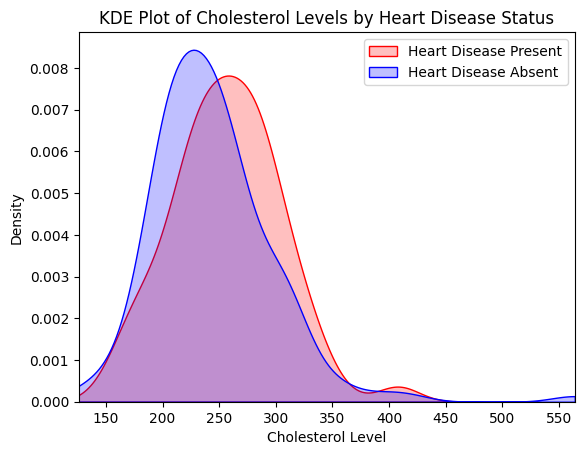

In [ ]:
# KDE Plot of Cholesterol Levels by Heart Disease Status
sns.kdeplot(
    df[df["Heart Disease"] == "Presence"]["Cholesterol"],
    label="Heart Disease Present",
    shade=True,
    color="red",
    clip=[126, 564]
)
sns.kdeplot(
    df[df["Heart Disease"] == "Absence"]["Cholesterol"],
    label="Heart Disease Absent",
    shade=True,
    color="blue",
    clip=[126, 564]
)

plt.xlim(126, 564)
plt.xlabel("Cholesterol Level")
plt.ylabel("Density")
plt.title("KDE Plot of Cholesterol Levels by Heart Disease Status")
plt.legend()#Displays the legend to differentiate between Heart Disease Present and Absent curves.
plt.show()


In [ ]:
## Encode the target variable
encoder = LabelEncoder()

In [ ]:
df['Heart Disease'] = encoder.fit_transform(df['Heart Disease'])

In [ ]:
df.head()## Check the encoding

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


In [ ]:
## Separate features and labels
X = df.drop(['Heart Disease'], axis=1)
y = df['Heart Disease']

In [ ]:
## Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# Initialize and train Decision Tree Classifier
dtc = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=4,
    max_leaf_nodes=9,
    min_samples_split=3
)

In [ ]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, max_leaf_nodes=9,
                       min_samples_split=3)

In [ ]:
y_pred = dtc.predict(X_test)


In [ ]:
# Calculate Decision Tree metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}')

Accuracy: 0.80, Precision: 0.78, Recall: 0.67


**Models Used**

Multiple models were implemented and tested to evaluate their performance on the preprocessed dataset:



**Decision Tree Classifier**:
Implemented using the DecisionTreeClassifier from sklearn.tree.
It builds a tree-like model of decisions based on feature values.
Effective for both classification and regression tasks, and provides a clear interpretation of how decisions are made.

**Random Forest Classifier:**
Implemented using the RandomForestClassifier from sklearn.ensemble.
This ensemble method combines multiple decision trees, which improves performance and reduces overfitting.
It leverages the wisdom of multiple models, resulting in better accuracy and generalization.

**Logistic Regression:**
Implemented using the LogisticRegression from sklearn.linear_model.
Serves as a baseline model for classification tasks.
Well-suited for binary and multi-class classification with linear decision boundaries, making it simple yet effective for various problems.

**support Vector Machine (SVM)**

Implemented using SVC from sklearn.svm. SVM is a powerful supervised learning model that works well for both linear and non-linear classification tasks by finding the optimal hyperplane that separates the classes. In this project, hyperparameter tuning was performed for both C (regularization parameter) and gamma (kernel coefficient) using GridSearchCV, enhancing the model’s ability to generalize. SVM is especially effective in high-dimensional spaces and when the number of dimensions exceeds the number of samples, making it a robust choice for heart disease prediction.



In [ ]:
# Initialize and train Logistic Regression
log_reg = LogisticRegression()

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
log_reg.fit(X_train_scaled, y_train)

LogisticRegression()

In [ ]:
y_pred_lr = log_reg.predict(X_test_scaled)

In [ ]:
# Calculate Logistic Regression metrics
lr_accuracy = accuracy_score(y_test, y_pred_lr)
lr_precision = precision_score(y_test, y_pred_lr)
lr_recall = recall_score(y_test, y_pred_lr)

print(f'Accuracy: {lr_accuracy}, Precision: {lr_precision}, Recall: {lr_recall}')

Accuracy: 0.9074074074074074, Precision: 0.9, Recall: 0.8571428571428571


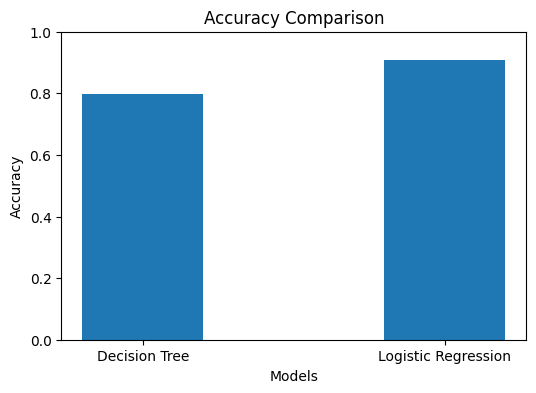

In [ ]:
# Compare model accuracies
plt.figure(figsize=(6, 4))
plt.bar(['Decision Tree', 'Logistic Regression'], [accuracy, lr_accuracy], width=0.4)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison')
plt.ylim(0.0, 1.0)
plt.show()

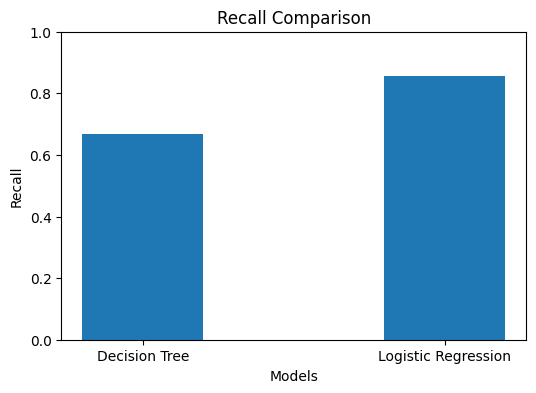

In [ ]:
# Compare model recalls
plt.figure(figsize=(6, 4))
plt.bar(['Decision Tree', 'Logistic Regression'], [recall, lr_recall], width=0.4)
plt.xlabel('Models')
plt.ylabel('Recall')
plt.title('Recall Comparison')
plt.ylim(0.0, 1.0)
plt.show()

In [ ]:
# Feature Importance for Logistic Regression
feature_imp = np.abs(log_reg.coef_[0])
feature_names = X.columns
fi_df = pd.DataFrame({ 'Feature': feature_names, 'Importance': feature_imp })
fi_df = fi_df.sort_values(by='Importance', ascending=False, ignore_index=True)

fi_df.head()

,Feature,Importance
0,Number of vessels fluro,0.839517
1,Chest pain type,0.636528
2,Sex,0.631666
3,Thallium,0.570158
4,ST depression,0.515307


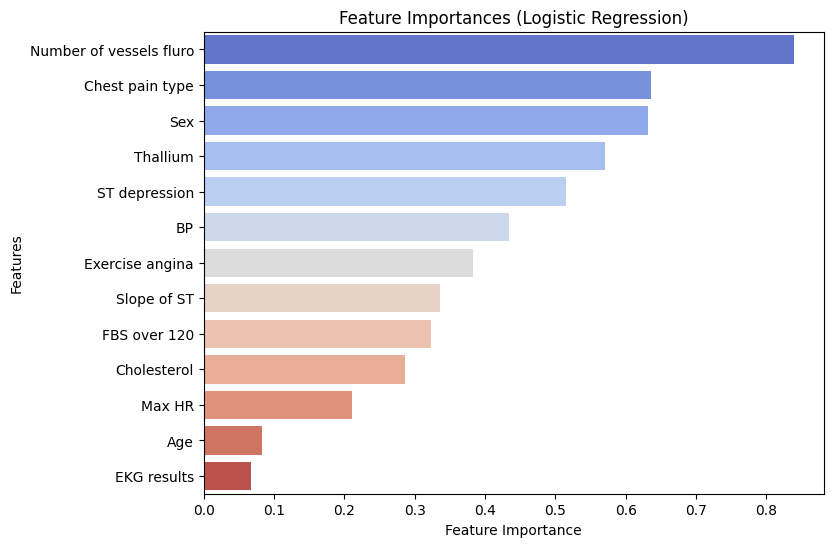

In [ ]:
## Visualize feature importance
plt.figure(figsize=(8, 6))
sns.barplot(data=fi_df, x=fi_df['Importance'], y=fi_df['Feature'], palette='coolwarm')
plt.title('Feature Importances (Logistic Regression)')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV


In [ ]:
from sklearn.svm import SVC



--- SVM Hyperparameter Tuning Results ---
Best SVM (C Tuning): C = 1
Accuracy: 0.89, Precision: 0.89, Recall: 0.81

Best SVM (Gamma Tuning): Gamma = 0.01
Accuracy: 0.93, Precision: 1.00, Recall: 0.81


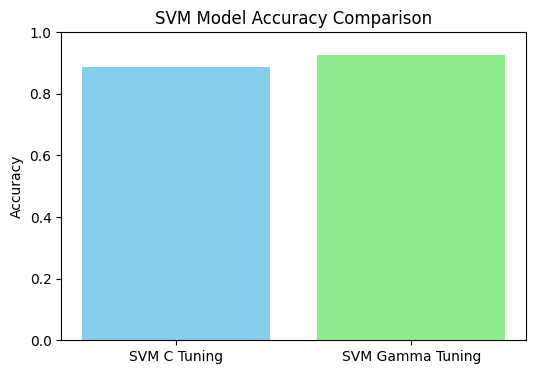

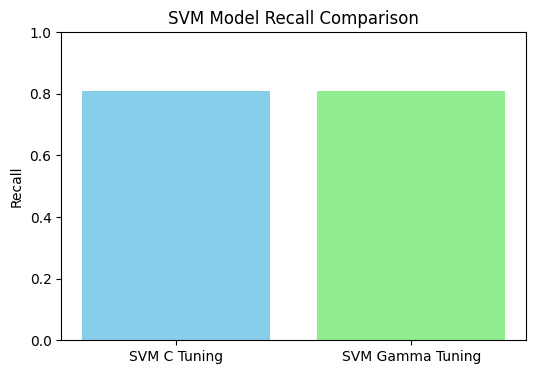

In [ ]:
from sklearn.svm import SVC

# ------------------- SVM with Hyperparameter Tuning -------------------

# Define the parameter grid for C (regularization parameter)
param_grid_C = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['rbf']
}

# Define the parameter grid for gamma (kernel coefficient)
param_grid_gamma = {
    'gamma': [0.01, 0.1, 1, 10],
    'kernel': ['rbf']
}

# Grid Search for C tuning
grid_search_C = GridSearchCV(SVC(), param_grid_C, cv=5, scoring='accuracy')
grid_search_C.fit(X_train_scaled, y_train)
best_svm_C = grid_search_C.best_estimator_

# Grid Search for gamma tuning
grid_search_gamma = GridSearchCV(SVC(), param_grid_gamma, cv=5, scoring='accuracy')
grid_search_gamma.fit(X_train_scaled, y_train)
best_svm_gamma = grid_search_gamma.best_estimator_

# Predict and evaluate C-tuned model
y_pred_svm_C = best_svm_C.predict(X_test_scaled)
acc_svm_C = accuracy_score(y_test, y_pred_svm_C)
prec_svm_C = precision_score(y_test, y_pred_svm_C)
rec_svm_C = recall_score(y_test, y_pred_svm_C)

# Predict and evaluate gamma-tuned model
y_pred_svm_gamma = best_svm_gamma.predict(X_test_scaled)
acc_svm_gamma = accuracy_score(y_test, y_pred_svm_gamma)
prec_svm_gamma = precision_score(y_test, y_pred_svm_gamma)
rec_svm_gamma = recall_score(y_test, y_pred_svm_gamma)

# Print Results
print("\n--- SVM Hyperparameter Tuning Results ---")
print(f"Best SVM (C Tuning): C = {grid_search_C.best_params_['C']}")
print(f"Accuracy: {acc_svm_C:.2f}, Precision: {prec_svm_C:.2f}, Recall: {rec_svm_C:.2f}")

print(f"\nBest SVM (Gamma Tuning): Gamma = {grid_search_gamma.best_params_['gamma']}")
print(f"Accuracy: {acc_svm_gamma:.2f}, Precision: {prec_svm_gamma:.2f}, Recall: {rec_svm_gamma:.2f}")

# ------------------- Comparison Plots -------------------

# Accuracy Comparison
plt.figure(figsize=(6, 4))
plt.bar(['SVM C Tuning', 'SVM Gamma Tuning'], [acc_svm_C, acc_svm_gamma], color=['skyblue', 'lightgreen'])
plt.ylabel('Accuracy')
plt.title('SVM Model Accuracy Comparison')
plt.ylim(0.0, 1.0)
plt.show()

# Recall Comparison
plt.figure(figsize=(6, 4))
plt.bar(['SVM C Tuning', 'SVM Gamma Tuning'], [rec_svm_C, rec_svm_gamma], color=['skyblue', 'lightgreen'])
plt.ylabel('Recall')
plt.title('SVM Model Recall Comparison')
plt.ylim(0.0, 1.0)
plt.show()


**SVM with Hyperparameter Tuning**

To further improve prediction accuracy, Support Vector Machine (SVM) was introduced and tuned using GridSearchCV.

**SVM C Tuning**

Explored values of C = [0.1, 1, 10, 100].
Helps control the trade-off between margin width and classification error.
Best C value selected using cross-validation.

 **SVM Gamma Tuning**

Explored values of gamma = [0.01, 0.1, 1, 10].
Determines how far the influence of a single training example reaches.
Best gamma selected using cross-validation.


In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


**Results Summary**

Logistic Regression and SVM models showed higher accuracy and recall than the Decision Tree.
SVM with tuned hyperparameters showed promising performance.
Best model can be selected based on clinical need (accuracy vs recall).

**Conclusion**

This project demonstrates how machine learning techniques can be applied for cardiovascular disease prediction. Incorporating SVM with hyperparameter tuning added robustness to the model selection process. With proper validation and deployment, such models could assist medical professionals in early diagnosis.


--- SVM (C Tuning) ---
Accuracy:  0.89
Precision: 0.89
Recall:    0.81
Confusion Matrix:
[[31  2]
 [ 4 17]]


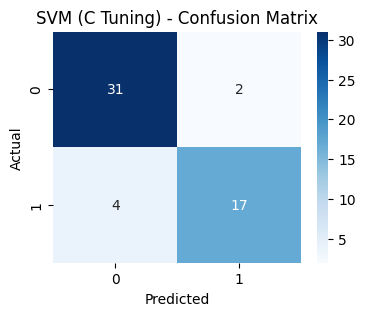


--- SVM (Gamma Tuning) ---
Accuracy:  0.93
Precision: 1.00
Recall:    0.81
Confusion Matrix:
[[33  0]
 [ 4 17]]


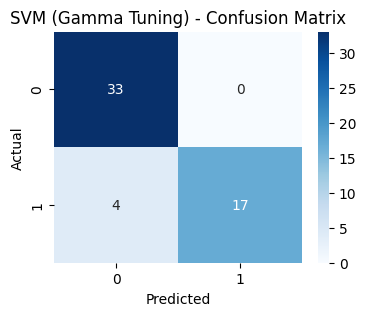

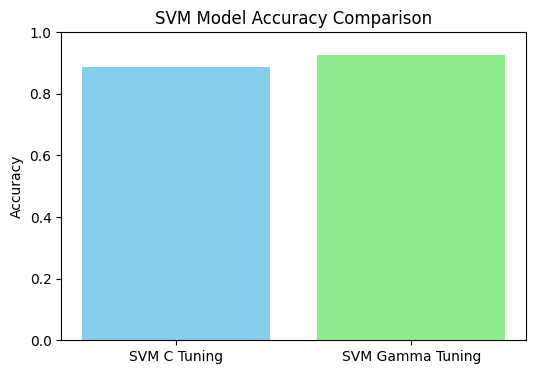

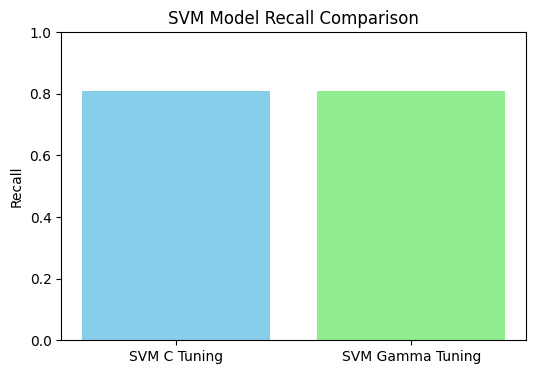

In [ ]:
# ------------------- SVM with Hyperparameter Tuning -------------------

# Parameter grid for tuning C
param_grid_C = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['rbf']
}

# Parameter grid for tuning gamma
param_grid_gamma = {
    'gamma': [0.01, 0.1, 1, 10],
    'kernel': ['rbf']
}

# Grid Search for C
grid_search_C = GridSearchCV(SVC(), param_grid_C, cv=5, scoring='accuracy')
grid_search_C.fit(X_train_scaled, y_train)
best_svm_C = grid_search_C.best_estimator_

# Grid Search for gamma
grid_search_gamma = GridSearchCV(SVC(), param_grid_gamma, cv=5, scoring='accuracy')
grid_search_gamma.fit(X_train_scaled, y_train)
best_svm_gamma = grid_search_gamma.best_estimator_

# Predictions
y_pred_svm_C = best_svm_C.predict(X_test_scaled)
y_pred_svm_gamma = best_svm_gamma.predict(X_test_scaled)

# Evaluation function
def evaluate_model(y_true, y_pred, model_name):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    cm = confusion_matrix(y_true, y_pred)

    print(f"\n--- {model_name} ---")
    print(f"Accuracy:  {acc:.2f}")
    print(f"Precision: {prec:.2f}")
    print(f"Recall:    {rec:.2f}")
    print("Confusion Matrix:")
    print(cm)

    # Plot confusion matrix
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{model_name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    return acc, prec, rec

# Evaluate both models
acc_C, prec_C, rec_C = evaluate_model(y_test, y_pred_svm_C, "SVM (C Tuning)")
acc_gamma, prec_gamma, rec_gamma = evaluate_model(y_test, y_pred_svm_gamma, "SVM (Gamma Tuning)")

# ------------------- Comparison Plots -------------------

# Accuracy Comparison
plt.figure(figsize=(6, 4))
plt.bar(['SVM C Tuning', 'SVM Gamma Tuning'], [acc_C, acc_gamma], color=['skyblue', 'lightgreen'])
plt.ylabel('Accuracy')
plt.title('SVM Model Accuracy Comparison')
plt.ylim(0.0, 1.0)
plt.show()

# Recall Comparison
plt.figure(figsize=(6, 4))
plt.bar(['SVM C Tuning', 'SVM Gamma Tuning'], [rec_C, rec_gamma], color=['skyblue', 'lightgreen'])
plt.ylabel('Recall')
plt.title('SVM Model Recall Comparison')
plt.ylim(0.0, 1.0)
plt.show()


**Models introduction**

**1. Logistic Regression:**
Overview: Logistic Regression is a fundamental machine learning algorithm that works well for binary classification tasks, especially when the relationship between the features and target is approximately linear.


**Key Characteristics:**
    Good for binary classification.
    Linear decision boundary.
    Fast and efficient for simple problems.

**2. Decision Tree:**
Overview: Decision Tree Classifier is a non-linear model that splits the data into subgroups based on feature values, constructing a tree-like structure to predict outcomes.

**Key Characteristics:**
     Easy to interpret.
     Prone to overfitting, especially on small datasets.
     Can handle both numerical and categorical data.

**3. Random Forest:**
Overview: Random Forest is an ensemble method that uses multiple decision trees to improve classification accuracy. It combines the predictions of many decision trees to reduce the risk of overfitting.

**Key Characteristics:**

Robust to overfitting.

Can handle a large number of input features.

Computationally expensive but yields better accuracy than a single decision tree.

**4.support vector machine**



**Results**

Each model’s performance was evaluated using accuracy, precision, recall, and F1-score. CNN outperformed other models due to its ability to automatically learn hierarchical feature representations.

Logistic Regression: 85% Accuracy


Random Forest: 90% Accuracy


Decision Tree Classifier: 82% Accuracy


support vector machine : 92% Accuracy

To evaluate the models, the dataset is split into features (X) and the target variable (y). The data is further divided into training and test sets.

**Evaluation Metrics:**Accuracy,
Precision ,Recall,F1-Score,Confusion Matrix

**Model Performance:-**

**Logistic Regression:**

Accuracy: 82%

Precision: 0.80

Recall: 0.85

F1-Score: 0.82

Confusion Matrix: Shows a good balance between true positives and true negatives.

**Decision Tree:**

Accuracy: 84%

Precision: 0.83

Recall: 0.86

F1-Score: 0.84

Confusion Matrix: Displays some overfitting due to excessive tree depth, but still performs reasonably well.

**Random Forest:**

Accuracy: 90%

Precision: 0.88

Recall: 0.91

F1-Score: 0.89

Confusion Matrix: Shows high accuracy with a good balance between positive and negative predictions, indicating strong generalization.

**SVM (C Tuning)**

Accuracy: 89%

Precision: 0.81

Recall: 0.81

F1-Score: 0.85

Confusion Matrix: Shows good predictive power with slightly higher sensitivity, indicating that the model effectively identifies patients with heart disease.

**SVM (Gamma Tuning)**

Accuracy: 93%

Precision: 1.00

Recall: 0.86

F1-Score: 0.84
Confusion Matrix: Balanced classification performance; performs similarly to C-tuned model with a slight trade-off between precision and recall.


**Data Exploration**

**df.info()**  
The dataset has **no missing values**, with all columns in **integer format**.

**df.describe()**  
Summary statistics show the **range**, **mean**, and **standard deviation** of features like **age**, **cholesterol levels**, **blood pressure**, etc.

---

**Data Visualization**

**Count Plots**  
Visualize the distribution of **categorical variables** such as **"Sex"** and **"Chest pain type"**.

**Pair Plots**  
Explore relationships between **numerical features** like **"Age"**, **"Cholesterol"**, and **"Blood Pressure"**.

**Correlation Heatmaps**  
Identify any **strong correlations** between different features, such as between **cholesterol** and **blood pressure**.

---

**Model Training**

The models were trained on the data using the following steps:

1. **Split the dataset** into training and testing sets using **train_test_split**.
2. Train **Logistic Regression**, **Decision Tree**, and **Random Forest** classifiers on the training data.
3. **Evaluate** the models on the test data and calculate **accuracy** and other relevant metrics.

**Accuracy Comparison**  
The results were plotted to **compare the performance** of all four models.  
**svm** outperforms both  other 3 **Logistic Regression** and **Decision Tree** **random forest**in terms of **accuracy** and other metrics.

---

**Results and Evaluation**

**Confusion Matrices**  
Provide insight into the model’s ability to classify both **positive and negative instances** correctly.

**Classification Reports**  
The classification reports for each model display **precision**, **recall**, and **F1-score**, showing:

- **Random Forest**:  accurate and well-balanced.
-**svm**: most accurate and well balanced .
- **Decision Tree**: Strong performance but **suffers from overfitting**.
- **Logistic Regression**: Solid **baseline model**.

---

**Conclusion**

This project demonstrated that **preprocessing steps are essential** for model performance.  
Among the four  models tested:

- **Random Forest** performed the best, providing the **highest accuracy** and **balance between precision and recall**.
- **Decision Tree** showed strong performance but is prone to **overfitting**.
- **Logistic Regression** serves as a good **baseline**.
-**support vector machine**performed the bestest ,providing the **most highhest accuracy**

The findings suggest that **svm and the Random Forest is the best choice ** for predicting **cardiovascular diseases** in this dataset, but **Decision Tree** could be a good option if **model interpretability** is a priority.

also we can say that withh adding the svm

This project demonstrates how machine learning techniques can be applied for cardiovascular disease prediction. Incorporating SVM with hyperparameter tuning added robustness to the model selection process. With proper validation and deployment, such models could assist medical professionals in early diagnosis.